In [1]:
def read_book(title_path):
    """Read a book as a string. With special characters removed."""
    with open(title_path,"r",encoding="utf8") as current_file:

        text = current_file.read()
        text = text.replace("\n","")
        text = text.replace("\r","")
    return text







text = read_book("/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Romeo and Juliet.txt")





i = text.find("What's in a name?")
i





sample_text = text[i:i+100]





def count_words_fast(text):
    """Returns numbers of occurences of a word in a text."""
    from collections import Counter
    text = text.lower()
    skips = [",",".",":",";","'",'"',"!","-"]
    for ch in skips:
        text.replace(ch,"")
    text = text.replace(".","")
    text = text.split(" ")
    word_counts  = Counter(text)
    return word_counts





def word_stats(text):
    """Returns the number of unique words in a text and the counts of each unique words."""
    return len(count_words_fast(text)),sum(count_words_fast(text).values())








def count_words(text):
    """Returns numbers of occurences of a word in a text."""
    text = text.lower()
    text = text.replace(".","")

    skips = [",",".",":",";","'",'"',"!","-"]
    for ch in skips:
        text.replace(ch,"")
    text = text.split(" ")
    words = {}
    for char in text:
        if char not in words:
            words[char]=text.count(char)
    return words


# In[9]:


t = word_stats(text)
t


# Comapre this with thte book's German transplation.

# In[11]:


text_ger = read_book('/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/German/shakespeare/Romeo und Julia.txt')





len(text_ger)




print(word_stats(text_ger))# for German Translation





import os
get_ipython().run_line_magic('pinfo', 'os.listdir')





direct = "/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books"





import pandas as pd
stats = pd.DataFrame(columns = ("Language","Author","Title","Length","Unique"))

title_num = 1

for language in os.listdir(direct):
    for author in os.listdir(direct+ "/"+language):
        for title in os.listdir(direct+ "/"+language + "/"+author):
            inputfile = direct+ "/"+language + "/"+author+"/"+title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique,counts) = word_stats(text)
            stats.loc[title_num] = language,author.capitalize(),title.replace(".txt",""),counts,num_unique
            title_num+=1






stats.head(20)

(8205, 20311)
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Othello.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Richard III.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Romeo and Juliet.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Macbeth.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/Hamlet.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/The Merchant of Venice.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/English/shakespeare/A Midsummer Night's Dream.txt
/home/debaparna/Documents/Python_for_research/Case studies/Project_Guttenberg_NLP/Books/German/schill

,Language,Author,Title,Length,Unique
1,English,Shakespeare,Othello,26590,5898
2,English,Shakespeare,Richard III,48315,6710
3,English,Shakespeare,Romeo and Juliet,40776,6207
4,English,Shakespeare,Macbeth,16874,4780
5,English,Shakespeare,Hamlet,28551,6776
6,English,Shakespeare,The Merchant of Venice,20949,4978
7,English,Shakespeare,A Midsummer Night's Dream,16103,4345
8,German,Schiller,Die Huldigung der KÅnste,3919,1805
9,German,Schiller,Wallensteins Lager,15443,4797
10,German,Schiller,Die Piccolomini,35456,7539


Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str, bytes, or a path-like object.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method


In [2]:
stats

,Language,Author,Title,Length,Unique
1,English,Shakespeare,Othello,26590,5898
2,English,Shakespeare,Richard III,48315,6710
3,English,Shakespeare,Romeo and Juliet,40776,6207
4,English,Shakespeare,Macbeth,16874,4780
5,English,Shakespeare,Hamlet,28551,6776
...,...,...,...,...,...
98,Portuguese,Branco,Carlota Angela,46927,14880
99,Portuguese,Branco,Estrellas Funestas,46709,14907
100,Portuguese,Branco,Estrellas Prop°cias,43445,13679
101,Portuguese,Branco,O que fazem mulheres,41175,13545


In [3]:
import matplotlib.pyplot as plt

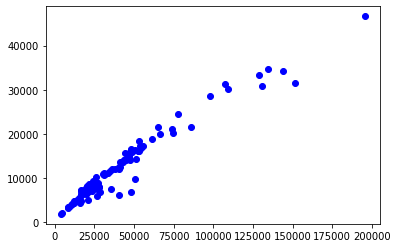

In [28]:
%matplotlib inline
plt.plot(stats.Length,stats.Unique,"bo")
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
%matplotlib widget
plt.loglog(stats.Length,stats.Unique,"rs")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# creating a 10x10 figure subplots

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<Figure size 1000x1000 with 0 Axes>

In [35]:
%matplotlib widget
plt.figure(figsize = (10,10))
subset = stats[stats["Language"]=="English"]
plt.loglog(subset.Length,subset.Unique,"o",color = "crimson",label  = "EN")
subset = stats[stats["Language"]=="French"]
plt.loglog(subset.Length,subset.Unique,"o",color = "forestgreen",label  = "FR")
subset = stats[stats["Language"]=="Portugese"]

plt.loglog(subset.Length,subset.Unique,"o",color = "blueviolet",label  = "PORT")
subset = stats[stats["Language"]=="German"]

plt.loglog(subset.Length,subset.Unique,"o",color = "orange",label  = "GER")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("No. of Unique words")








Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'No. of Unique words')